# Assignment 4

In [24]:
import ml_pipeline as pp
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import datetime as dt

## Load data

In [115]:
filename = './data/projects_2012_2013.csv'
df = pp.load_csv(filename)

## Process data for clustering

### Missing values

In [136]:
df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded'],
      dtype='object')

In [116]:
pp.na_col(df)

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

In [117]:
cat_col = ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level']
for c in cat_col:
    df_all = pp.na_fill_col(df, c, pp.most_freq)

In [118]:
df_all = pp.na_fill_col(df, 'students_reached', np.nanmean)

### Categorical variables to binary

In [119]:
df_all = pp.feat_binary(df, ['school_city','school_state','school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])

### Normalization

In [120]:
num_col = ['total_price_including_optional_support', 'students_reached']

In [121]:
pp.normalize_mult_minmax(df_all, num_col)

MinMaxScaler(copy=True, feature_range=(0, 1))

### Given a k, generate k clusters using KMeans

In [122]:
cat_feat = ['school_metro_rural',
 'school_metro_suburban',
 'school_metro_urban',
 'school_charter_f',
 'school_charter_t',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutrition',
 'primary_focus_subject_Other',
 'primary_focus_subject_Parent Involvement',
 'primary_focus_subject_Performing Arts',
 'primary_focus_subject_Social Sciences',
 'primary_focus_subject_Special Needs',
 'primary_focus_subject_Sports',
 'primary_focus_subject_Visual Arts',
 'primary_focus_area_Applied Learning',
 'primary_focus_area_Health & Sports',
 'primary_focus_area_History & Civics',
 'primary_focus_area_Literacy & Language',
 'primary_focus_area_Math & Science',
 'primary_focus_area_Music & The Arts',
 'primary_focus_area_Special Needs',
 'grade_level_Grades 3-5',
 'grade_level_Grades 6-8',
 'grade_level_Grades 9-12',
 'grade_level_Grades PreK-2',
 'resource_type_Books',
 'resource_type_Other',
 'resource_type_Supplies',
 'resource_type_Technology',
 'resource_type_Trips',
 'resource_type_Visitors']
num_feat = ['total_price_including_optional_support', 'students_reached']
features = cat_feat + num_feat

In [123]:
# rename columns so they can shown by export_graphviz
for c in df_all.columns:
    if '&' in c:
        new = c.replace(' & ', '')
        df_all = df_all.rename(columns = {c:new})
        features.remove(c)
        features.append(new)

In [124]:
df_all['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, df_all[features])

## Summary statistics for each cluster

### Identify the number of data points in each cluster

In [125]:
pp.cluster_size(df_all, 'cluster_prediction')

cluster_prediction
0    56066
1    68910
Name: cluster_prediction, dtype: int64

### Summarize features in each cluster

In [126]:
pp.summarize_kmeans_features(df_all, 'cluster_prediction')

cluster_prediction                                                    0  \
school_ncesid                               mean     249454408156.13455   
school_latitude                             mean      36.87152599192029   
school_longitude                            mean     -94.97633523199447   
total_price_including_optional_support      mean   0.002955617560942986   
students_reached                            mean  0.0052326978559264865   
school_metro_rural                          mean    0.11035208504262833   
school_metro_suburban                       mean     0.2625298755038704   
school_metro_urban                          mean     0.6271180394535012   
school_charter_f                            mean     0.9047372739271573   
school_charter_t                            mean    0.09526272607284272   
primary_focus_subject_Applied Sciences      mean                    0.0   
primary_focus_subject_Character Education   mean                    0.0   
primary_focus_subject_CivicsGovernment      mean                    0.0   
primary_focus_subject_CollegeCareer Prep    mean                    0.0   
primary_focus_subject_Community Service     mean                    0.0   
primary_focus_subject_ESL                   mean     0.0286091392287661   
primary_focus_subject_Early Development     mean                    0.0   
primary_focus_subject_Economics             mean                    0.0   
primary_focus_subject_Environmental Science mean                    0.0   
primary_focus_subject_Extracurricular       mean                    0.0   
primary_focus_subject_Foreign Languages     mean    0.01601683729889773   
primary_focus_subject_GymFitness            mean                    0.0   
primary_focus_subject_HealthLife Science    mean                    0.0   
primary_focus_subject_HealthWellness        mean                    0.0   
primary_focus_subject_HistoryGeography      mean                    0.0   
primary_focus_subject_Literacy              mean     0.6674811828915921   
primary_focus_subject_LiteratureWriting     mean     0.2878928405807441   
primary_focus_subject_Mathematics           mean                    0.0   
primary_focus_subject_Music                 mean                    0.0   
primary_focus_subject_Nutrition             mean                    0.0   
primary_focus_subject_Other                 mean                    0.0   
primary_focus_subject_Parent Involvement    mean                    0.0   
primary_focus_subject_Performing Arts       mean                    0.0   
primary_focus_subject_Social Sciences       mean                    0.0   
primary_focus_subject_Special Needs         mean                    0.0   
primary_focus_subject_Sports                mean                    0.0   
primary_focus_subject_Visual Arts           mean                    0.0   
primary_focus_area_Applied Learning         mean                    0.0   
primary_focus_area_HealthSports             mean                    0.0   
primary_focus_area_HistoryCivics            mean                    0.0   
primary_focus_area_LiteracyLanguage         mean                      1   
primary_focus_area_MathScience              mean                    0.0   
primary_focus_area_MusicThe Arts            mean                    0.0   
primary_focus_area_Special Needs            mean                    0.0   
grade_level_Grades 3-5                      mean     0.3157171904541077   
grade_level_Grades 6-8                      mean    0.13025719687511148   
grade_level_Grades 9-12                     mean    0.08224235722184568   
grade_level_Grades PreK-2                   mean     0.4717832554489352   
resource_type_Books                         mean    0.34297078443263296   
resource_type_Other                         mean    0.09506652873399209   
resource_type_Supplies                      mean     0.2018335533121678   
resource_type_Technology                    mean     0.3583633574715514   
resource_type_Trips      

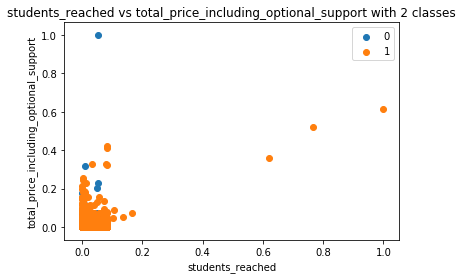

In [127]:
pp.plot_2d_cluster(df_all, 'cluster_prediction','students_reached', 'total_price_including_optional_support')

### Identify "distinctive" features of clusters

In [128]:
# fit classifier
#features.append('primary_focus_area_LiteracyLanguage')
dt_1 = DecisionTreeClassifier(max_depth = 5)
dt_1.fit(df_all[features], df_all['cluster_prediction'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
# graph tree
pp.graph_tree(dt_1, features, 'treeall.png')

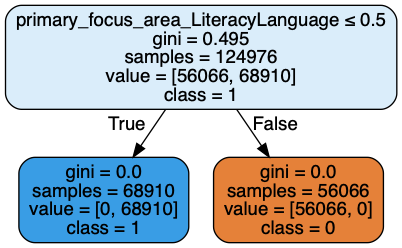

In [130]:
# show image
Image('treeall.png')

### Now look at distinguishing features when removing 'primary_focus_area_LiteracyLanguage'

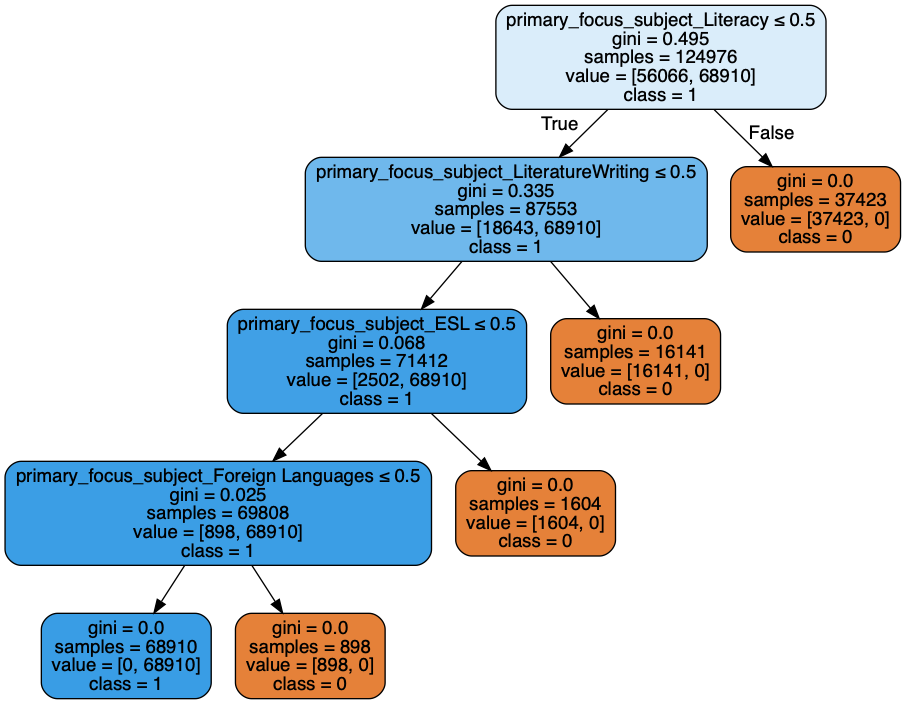

In [134]:
#features.remove('primary_focus_area_LiteracyLanguage')
dt_2 = DecisionTreeClassifier(max_depth = 5)
dt_2.fit(df_all[features], df_all['cluster_prediction'])
pp.graph_tree(dt_2, features, 'treeall2.png')
Image('treeall2.png')

# Further analysis

## Merge clusters into one

In [334]:
# create fake dataset to run these on 
df_final = x_test1.copy()

In [335]:
z=pp.merge_clusters(df_final, 'cluster_prediction', [0,1],1)

In [336]:
z['cluster_prediction'].unique()

array([1])

## Recluster with a new k

In [355]:
df_final['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':3}, df_final[features])

In [356]:
df_final['cluster_prediction'].unique()

array([0, 1, 2])

## Split a specific cluster into many (with a specific number of new clustering)

In [358]:
df_final =pp.split_cluster(df_final, 'cluster_prediction', features,2, {'n_clusters':3},[2,3,4])

In [359]:
df_final['cluster_prediction'].unique()

array([0., 1., 2., 3., 4.])

## Clustering HW5 predictions

In [77]:
pred_hw5 = pp.load_csv('./data/hw5_top5.csv')

In [158]:
pred_hw5['cluster'] = pp.kmeans_label(KMeans(), {'n_clusters':4}, pred_hw5[features])

In [159]:
pred_hw5.cluster.unique()

array([0, 3, 2, 1])

In [160]:
focus = [x for x in pred_hw5.columns if 'primary_focus' in x]
focus.append('cluster')

In [161]:
pp.summarize_kmeans_features(pred_hw5, 'cluster')

cluster                                                                0  \
index                                         mean    10135.940540540541   
school_city_Bakersfield                       mean                   0.0   
school_city_Baltimore                         mean                   0.0   
school_city_Bronx                             mean                   0.0   
school_city_Brooklyn                          mean                   0.0   
school_city_Charlotte                         mean                   0.0   
school_city_Chicago                           mean                   0.0   
school_city_Columbus                          mean                   0.0   
school_city_Dallas                            mean                   0.0   
school_city_Denver                            mean                     0   
school_city_Houston                           mean  0.005405405405405406   
school_city_Indianapolis                      mean                   0.0   
school_city_Las Vegas                         mean   0.03783783783783784   
school_city_Los Angeles                       mean  0.016216216216216217   
school_city_Memphis                           mean                   0.0   
school_city_N Hollywood                       mean                   0.0   
school_city_New Orleans                       mean                   0.0   
school_city_New York                          mean                   0.0   
school_city_North Hills                       mean                     0   
school_city_Oakland                           mean                   0.0   
school_city_Other                             mean    0.9297297297297298   
school_city_Philadelphia                      mean                   0.0   
school_city_Phoenix                           mean                   0.0   
school_city_Portland                          mean                     0   
school_city_Richmond                          mean                   0.0   
school_city_Sacramento                        mean                     0   
school_city_San Francisco                     mean                     0   
school_city_Seattle                           mean  0.005405405405405406   
school_city_South Gate                        mean  0.005405405405405406   
school_city_Tulsa                             mean                   0.0   
...                                                                  ...   
secondary_focus_area_Special Needs            mean  0.043243243243243246   
resource_type_Books                           mean   0.14054054054054055   
resource_type_Other                           mean   0.14054054054054055   
resource_type_Supplies                        mean   0.23243243243243245   
resource_type_Technology                      mean    0.4810810810810811   
resource_type_Trips                           mean                   0.0   
resource_type_Visitors                        mean  0.005405405405405406   
poverty_level_high poverty                    mean   0.24324324324324326   
poverty_level_highest poverty                 mean    0.4486486486486487   
poverty_level_low poverty                     mean   0.02702702702702703   
poverty_level_moderate poverty                mean    0.2810810810810811   
grade_level_Grades 3-5                        mean   0.32432432432432434   
grade_level_Grades 6-8                        mean   0.15675675675675677   
grade_level_Grades 9-12                       mean    0.0972972972972973   
grade_level_Grades PreK-2                     mean   0.42162162162162165   
total_price_including_optional_support_lowest mean   0.04864864864864865   
total_price_including_optional_support_low    mean                   0.2   
total_price_including_optional_support_medium mean    0.1837837837837838   
total_price_including_optional_support_high   mean    0.5675675675675675   
students_reached_lowest                       mean   0.31891891891891894   
students_reached_low                          me

In [162]:
pp.summarize_kmeans_features(pred_hw5[focus], 'cluster')

cluster                                                              0  \
primary_focus_subject_Applied Sciences      mean   0.02702702702702703   
primary_focus_subject_Character Education   mean  0.010810810810810811   
primary_focus_subject_CivicsGovernment      mean                   0.0   
primary_focus_subject_CollegeCareer Prep    mean                   0.0   
primary_focus_subject_Community Service     mean  0.005405405405405406   
primary_focus_subject_ESL                   mean  0.021621621621621623   
primary_focus_subject_Early Development     mean  0.021621621621621623   
primary_focus_subject_Economics             mean  0.005405405405405406   
primary_focus_subject_Environmental Science mean  0.016216216216216217   
primary_focus_subject_Extracurricular       mean  0.005405405405405406   
primary_focus_subject_Foreign Languages     mean  0.005405405405405406   
primary_focus_subject_GymFitness            mean                   0.0   
primary_focus_subject_HealthLife Science    mean  0.005405405405405406   
primary_focus_subject_HealthWellness        mean  0.005405405405405406   
primary_focus_subject_HistoryGeography      mean  0.010810810810810811   
primary_focus_subject_Literacy              mean    0.4756756756756757   
primary_focus_subject_LiteratureWriting     mean    0.1891891891891892   
primary_focus_subject_Mathematics           mean  0.010810810810810811   
primary_focus_subject_Music                 mean  0.016216216216216217   
primary_focus_subject_Nutrition             mean                     0   
primary_focus_subject_Other                 mean   0.02702702702702703   
primary_focus_subject_Parent Involvement    mean                     0   
primary_focus_subject_Performing Arts       mean  0.010810810810810811   
primary_focus_subject_Social Sciences       mean  0.005405405405405406   
primary_focus_subject_Special Needs         mean   0.08648648648648649   
primary_focus_subject_Sports                mean                   0.0   
primary_focus_subject_Visual Arts           mean   0.03783783783783784   
primary_focus_area_Applied Learning         mean   0.07027027027027027   
primary_focus_area_HealthSports             mean  0.005405405405405406   
primary_focus_area_HistoryCivics            mean  0.021621621621621623   
primary_focus_area_LiteracyLanguage         mean    0.6918918918918919   
primary_focus_area_MathScience              mean   0.05945945945945946   
primary_focus_area_MusicThe Arts            mean   0.06486486486486487   
primary_focus_area_Special Needs            mean   0.08648648648648649   

cluster                                                             1  \
primary_focus_subject_Applied Sciences      mean  0.05128205128205128   
primary_focus_subject_Character Education   mean                  0.0   
primary_focus_subject_CivicsGovernment      mean                  0.0   
primary_focus_subject_CollegeCareer Prep    mean                  0.0   
primary_focus_subject_Community Service     mean                  0.0   
primary_focus_subject_ESL                   mean                  0.0   
primary_focus_subject_Early Development     mean                  0.0   
primary_focus_subject_Economics             mean                  0.0   
primary_focus_subject_Environmental Science mean  0.10256410256410256   
primary_focus_subject_Extracurricular       mean                  0.0   
primary_focus_subject_Foreign Languages     mean                  0.0   
primary_focus_subject_GymFitness            mean                  0.0   
primary_focus_subject_HealthLife Science    mean  0.05128205128205128   
primary_focus_subject_HealthWellness        mean                  0.0   
primary_focus_subject_HistoryGeography      mean                  0.0   
primary_focus_subject_Literacy              mean                  0.0   
primary_focus_subject_LiteratureWriting     mean                  0.0   
primary_focus_subject_Mathematics           mean   0.7948717948717948   
primary_focus_subject_

In [109]:
pp.cluster_size(pred_hw5, 'cluster')

cluster
0    601
1    484
Name: cluster, dtype: int64

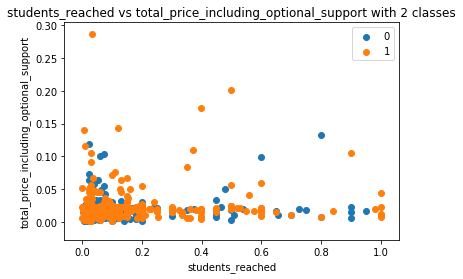

In [110]:
pp.plot_2d_cluster(pred_hw5, 'cluster','students_reached', 'total_price_including_optional_support')

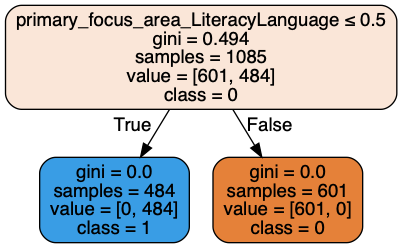

In [113]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(pred_hw5[features], pred_hw5['cluster'])
pp.graph_tree(dt, features, 'hw5tree.png')
Image('hw5tree.png')

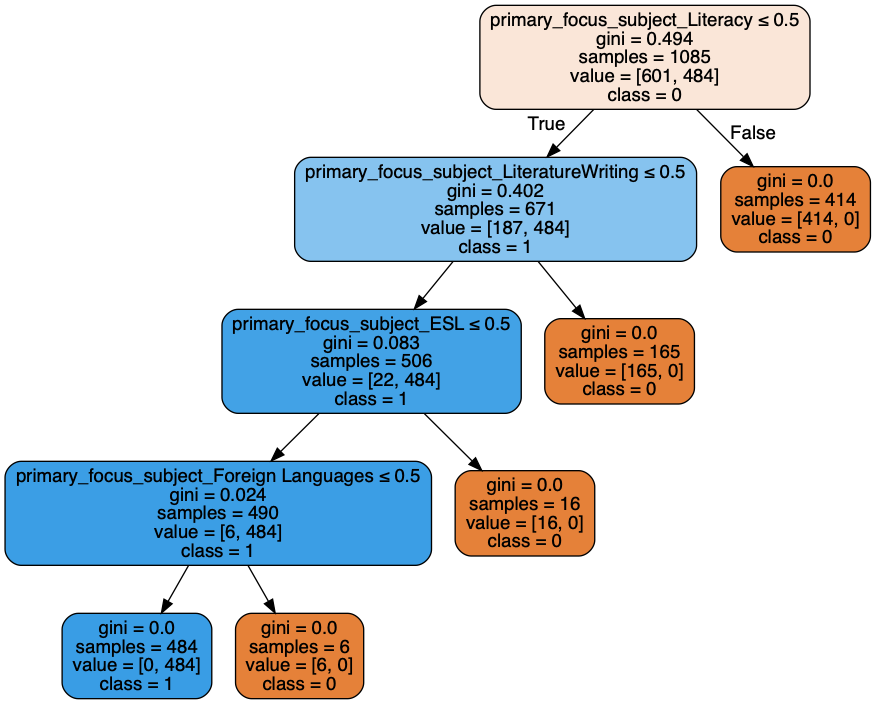

In [114]:
features.remove('primary_focus_area_LiteracyLanguage')
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(pred_hw5[features], pred_hw5['cluster'])
pp.graph_tree(dt, features, 'hw5tree.png')
Image('hw5tree.png')